In [31]:
import os
import dask.dataframe as dd
import dask.array as da
import matplotlib.pylab as plt

from dask.distributed import Client

client = Client("tcp://172.22.16.67:39043")

# Demo

In [32]:
# Generate some data
df = dd.demo.make_timeseries(
    start="1970-01-01",
    end="2022-12-31",
    dtypes={"x": float, "y": float, "a": float, "b": float, "c": float, "d": float},
    freq="1s",
    partition_freq="1ME",
    seed=1,
)

/memfs/13850117/poetry_cache/virtualenvs/2022-krakow-lgad-yqO2ELeT-py3.11/lib/python3.11/site-packages/dask_expr/_collection.py:5983: UserWarning: dask_expr does not support the DataFrameIOFunction protocol for column projection. To enable column projection, please ensure that the signature of `func` includes a `columns=` keyword argument instead.
  warnings.warn(


In [33]:
df

,x,y,a,b,c,d
npartitions=635,,,,,,
1970-01-31,float64,float64,float64,float64,float64,float64
1970-02-28,...,...,...,...,...,...
...,...,...,...,...,...,...
2022-11-30,...,...,...,...,...,...
2022-12-31,...,...,...,...,...,...


In [34]:
df.head()

,x,y,a,b,c,d
timestamp,,,,,,
1970-01-31 00:00:00,-0.176044,-0.190188,0.663767,-0.990593,0.014111,0.892177
1970-01-31 00:00:01,0.593030,0.061069,-0.265768,0.230603,0.273222,0.230890
1970-01-31 00:00:02,0.331898,-0.229740,0.025753,-0.996398,-0.645902,-0.991500
1970-01-31 00:00:03,-0.953630,-0.291027,-0.046337,0.667296,0.120379,-0.309323
1970-01-31 00:00:04,-0.115728,0.139690,0.429294,0.243333,0.251645,-0.105868


In [35]:
df.count().compute()

x    1669852800
y    1669852800
a    1669852800
b    1669852800
c    1669852800
d    1669852800
dtype: int64

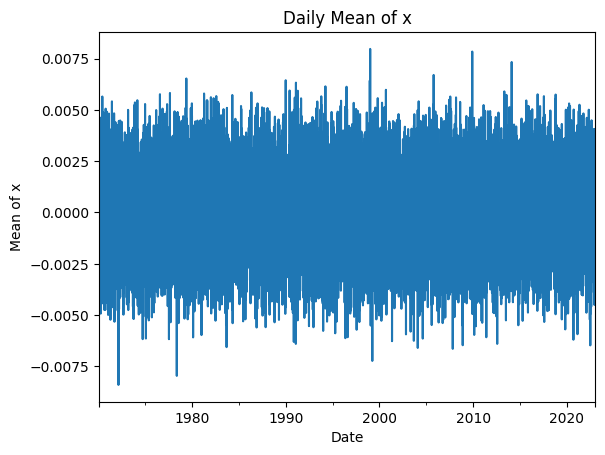

In [38]:
df["x"].resample("1D").mean().compute().plot()
plt.xlabel("Date")
plt.ylabel("Mean of x")
plt.title("Daily Mean of x")
plt.show()